In [4]:
imgs = {
    "PAT_56_86_479.png"     : {'A' : 2, 'B' : 5, 'C' : 2},
    "PAT_59_46_537.png"     : {'A' : 2, 'B' : 5, 'C' : 2},
    "PAT_70_107_591.png"    : {'A' : 2, 'B' : 0, 'C' : 3},
    "PAT_109_868_113.png"   : {'A' : 2, 'B' : 0, 'C' : 2},
    "PAT_320_681_410.png"   : {'A' : 2, 'B' : 0, 'C' : 2},
    "PAT_324_1465_43.png"   : {'A' : 2, 'B' : 0, 'C' : 2},
    "PAT_340_714_68.png"    : {'A' : 2, 'B' : 6, 'C' : 3},
    "PAT_471_909_394.png"   : {'A' : 2, 'B' : 4, 'C' : 3},
    "PAT_490_933_17.png"    : {'A' : 1, 'B' : 6, 'C' : 1},
    "PAT_627_1188_503.png"  : {'A' : 2, 'B' : 0, 'C' : 3},
    "PAT_656_1246_483.png"  : {'A' : 2, 'B' : 4, 'C' : 2},
    "PAT_680_1289_585.png"  : {'A' : 2, 'B' : 4, 'C' : 2},
    "PAT_754_1429_380.png"  : {'A' : 2, 'B' : 5, 'C' : 3},
    "PAT_795_1508_925.png"  : {'A' : 2, 'B' : 0, 'C' : 1},
    "PAT_884_1683_538.png"  : {'A' : 2, 'B' : 2, 'C' : 4},
    "PAT_895_1699_872.png"  : {'A' : 2, 'B' : 2, 'C' : 3},
    "PAT_966_1825_584.png"  : {'A' : 2, 'B' : 2, 'C' : 3},
    "PAT_995_1867_165.png"  : {'A' : 2, 'B' : 0, 'C' : 3},
    "PAT_1113_458_387.png"  : {'A' : 1, 'B' : 6, 'C' : 2},
    "PAT_1259_892_793.png"  : {'A' : 2, 'B' : 3, 'C' : 4},
    "PAT_1286_1000_517.png" : {'A' : 1, 'B' : 8, 'C' : 2},
    "PAT_1420_1460_951.png" : {'A' : 2, 'B' : 6, 'C' : 3},
    "PAT_1653_2916_346.png" : {'A' : 2, 'B' : 2, 'C' : 3},
    "PAT_1698_3122_83.png"  : {'A' : 1, 'B' : 8, 'C' : 1},
    "PAT_1928_3876_437.png" : {'A' : 2, 'B' : 8, 'C' : 3},
    "PAT_2017_4164_500.png" : {'A' : 2, 'B' : 0, 'C' : 4},
    "PAT_2103_4581_72.png"  : {'A' : 2, 'B' : 8, 'C' : 2}
}

In [6]:
from feature_A import fA_extractor, fA_formula
from feature_B import fB_formula
from feature_C import fC_formula
from pathlib import Path
import pandas as pd
import numpy as np
import os
from img_util import readImageFile
from sklearn.metrics import accuracy_score

metadata_dir = "../data/metadata.csv"
img_dir = "../data/lesion_imgs/"
mask_dir ="../data/lesion_masks/"
md = pd.read_csv(metadata_dir)

A_preds = [None] * len(imgs)
B_preds = [None] * len(imgs)
C_preds = [None] * len(imgs)

i = 0
for img in imgs.keys():

    # get the full path of the image
    img_path = os.path.join(img_dir, img)

    # get the name of the corresponding mask
    name, ext = os.path.splitext(img)
    mask_name = f"{name}_mask{ext}"

    # get the full path of the mask
    mask_path = os.path.join(mask_dir, mask_name)


    img_rgb, img_gray = readImageFile(img_path)
    mask_gs = readImageFile(mask_path, is_mask= True)
    mask = (mask_gs > 127).astype(np.uint8) # mask as binary
    # if the mask only contains 0s, update counter and skip

    # binary value to indicate if it is melanoma or not
    diagnosis = md[md['img_id'] == img]['diagnostic'].values[0]
    true_label = 1 if diagnosis == 'MEL' else 0

    # extract features
    mean_score, worst_score = 0, 0# fA_extractor(mask_gs)
    A_val, _ = 2, 0# fA_formula(mean_score, worst_score)
    B_val = 5# fB_formula(mask)
    C_val = 3# fC_formula(img_rgb, mask)

    # append predictions
    A_preds[i] = A_val
    B_preds[i] = B_val
    C_preds[i] = C_val

    i += 1

# compute accuracy for each feature:
A_values = [v['A'] for v in imgs.values()]
B_values = [v['B'] for v in imgs.values()]
C_values = [v['C'] for v in imgs.values()]

A_accuracy = accuracy_score(A_values, A_preds)
B_accuracy = accuracy_score(B_values, B_preds)
C_accuracy = accuracy_score(C_values, C_preds)

print(f"Prediction accuracy for A feature: {A_accuracy}")
print(f"Prediction accuracy for B feature: {B_accuracy}")
print(f"Prediction accuracy for C feature: {C_accuracy}")



Prediction accuracy for A feature: 0.8518518518518519
Prediction accuracy for B feature: 0.1111111111111111
Prediction accuracy for C feature: 0.4074074074074074


Latex code for the table saved to [../data/formula_table.tex]
Table saved in [../data/formula_table.pdf]


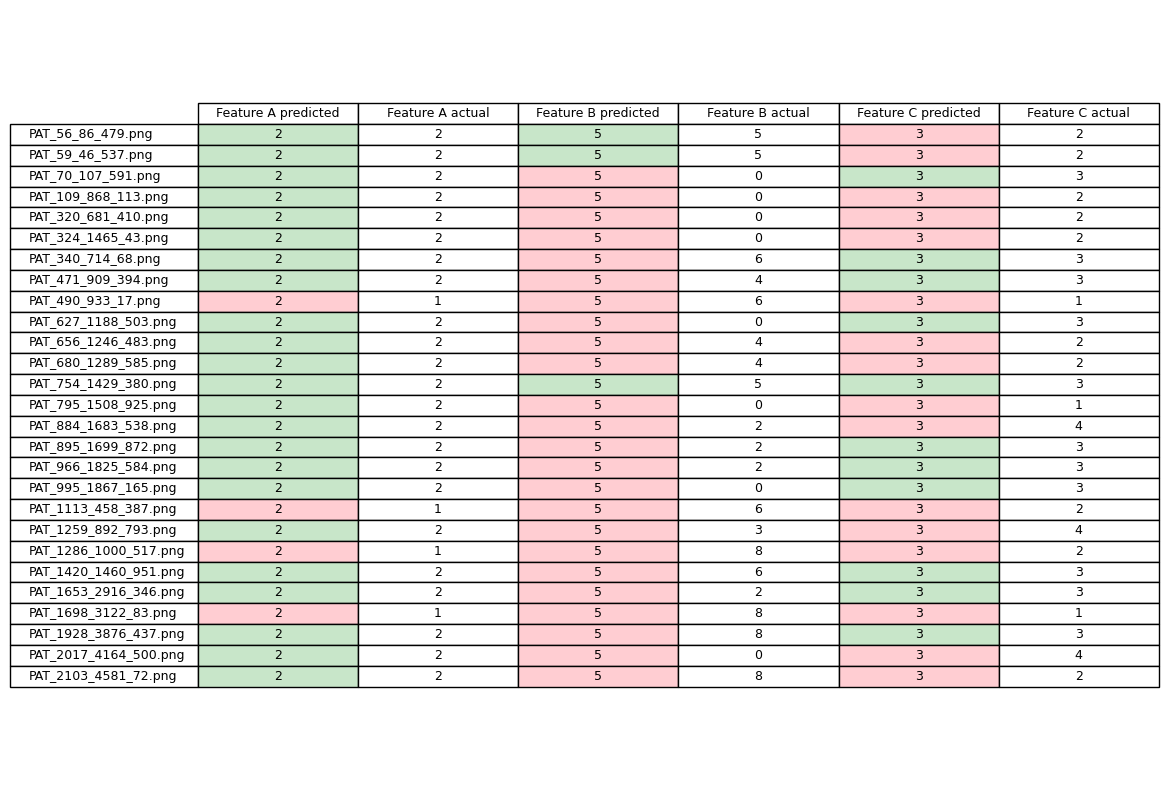

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Example data
data = {
    ("Feature A", "predicted") : A_preds,
    ("Feature A", "actual")    : A_values,
    ("Feature B", "predicted") : B_preds,
    ("Feature B", "actual")    : B_values,
    ("Feature C", "predicted") : C_preds,
    ("Feature C", "actual")    : C_values,
}
index = imgs.keys()
df = pd.DataFrame(data, index=index)

latex_text = df.to_latex()
with open("../data/formula_table.tex", "w") as f:
    f.write(latex_text)

print(f"Latex code for the table saved to [../data/formula_table.tex]")

# Plot table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Format column headers
columns_flat = ["{} {}".format(*col) for col in df.columns]
cell_text = df.values.tolist()

# Draw table
table = plt.table(cellText=cell_text,
                  rowLabels=df.index,
                  colLabels=columns_flat,
                  cellLoc='center',
                  loc='center')

# Apply color formatting
for i, row in enumerate(df.index):
    for j, (feat, typ) in enumerate(df.columns):
        if typ == "predicted":
            actual_val = df.iloc[i][(feat, "actual")]
            pred_val = df.iloc[i][(feat, "predicted")]
            cell = table[i+1, j]  # +1 because row 0 is header
            if pred_val == actual_val:
                cell.set_facecolor("#c8e6c9")  # light green
            else:
                cell.set_facecolor("#ffcdd2")  # light red

plt.tight_layout()
plt.savefig("../data/formula_table.pdf", dpi=300)
print(f"Table saved in [../data/formula_table.pdf]")
plt.show()
